In [1]:
# Basic Operation, cleaning
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Standardize features
from sklearn.preprocessing import StandardScaler

# Model Building
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the data

In [2]:
train = pd.read_csv('satelitte.csv')
train_df = train.copy()

train.head()

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2A,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data cleaning

#### Explore columns that have missing values.

In [3]:
missing = train_df.isnull().sum()[train_df.isnull().sum() > 0]
missing_df = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(train_df)}).sort_values(by = 'NaN_percentage', ascending = False)
pd.set_option('display.max_rows', None)
missing_df

,NaN_count,NaN_percentage
Unnamed: 49,5467,1.000000
Unnamed: 40,5467,1.000000
Unnamed: 42,5467,1.000000
Unnamed: 43,5467,1.000000
Unnamed: 44,5467,1.000000
Unnamed: 45,5467,1.000000
Unnamed: 46,5467,1.000000
Unnamed: 47,5467,1.000000
Unnamed: 48,5467,1.000000
Unnamed: 39,5467,1.000000


### Drop all empty columns and those where are missing too many values.

In [4]:
train_df = train_df.drop(columns = ['Expected Lifetime (yrs.)', 'Source', 'Comments', 'Source.2', 'Detailed Purpose', 'Source.3',
                                   'Power (watts)', 'Source.4', 'Source.1', 'Source.5', 'Source.6',
                                   'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 64', 'Unnamed: 63', 'Unnamed: 53',
                                   'Unnamed: 59', 'Unnamed: 58', 'Unnamed: 57', 'Unnamed: 56', 'Unnamed: 55', 'Unnamed: 54', 'Unnamed: 65',
                                   'Unnamed: 51', 'Unnamed: 50', 'Unnamed: 49', 'Unnamed: 48' ,'Unnamed: 47', 'Unnamed: 46', 'Unnamed: 45',
                                   'Unnamed: 44', 'Unnamed: 43', 'Unnamed: 42', 'Unnamed: 41', 'Unnamed: 40', 'Unnamed: 39', 'Unnamed: 38',
                                   'Unnamed: 37', 'Unnamed: 52', 'Unnamed: 36', 'Unnamed: 27'])

### Check and delete irrevelant columns

In [5]:
pd.set_option('display.max_columns', None)
train_df.head()

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Date of Launch,Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Source Used for Orbital Data
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,LEO,Non-Polar Inclined,0.0,566,576,0.000720,36.90,96.08,22,11/12/2019,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859.0,JMSatcat/3_20
1,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,LEO,Sun-Synchronous,0.0,497,517,0.001450,97.45,94.70,5,23/06/2017,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775.0,JMSatcat/10_17
2,AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,LEO,Sun-Synchronous,0.0,442,687,0.017700,98.20,95.90,1,25/04/2016,University of Aalborg,Denmark,Guiana Space Center,Soyuz-2.1a,2016-025E,41460.0,Space50
3,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,75.0,35 778,35 793,0.000178,0.08,1436.03,6 330,06/02/2014,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508.0,ZARYA
4,ABS-2A,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,-75.0,35 700,35 700,0.000000,0.00,1436.10,1 800,15/06/2016,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588.0,Estimated


In [6]:
train_df = train_df.drop(columns = ['Class of Orbit', 'Name of Satellite, Alternate Names', 'Current Official Name of Satellite',
                                    'Country/Org of UN Registry', 'Country of Operator/Owner', 'Operator/Owner',
                                    'Users', 'Purpose', 'Date of Launch', 'Contractor', 'Country of Contractor',
                                    'Launch Site', 'Launch Vehicle', 'COSPAR Number', 'NORAD Number', 
                                    'Source Used for Orbital Data', 'Longitude of GEO (degrees)'])

In [7]:
train_df.head()

,Type of Orbit,Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.)
0,Non-Polar Inclined,566,576,0.000720,36.90,96.08,22
1,Sun-Synchronous,497,517,0.001450,97.45,94.70,5
2,Sun-Synchronous,442,687,0.017700,98.20,95.90,1
3,NaN,35 778,35 793,0.000178,0.08,1436.03,6 330
4,NaN,35 700,35 700,0.000000,0.00,1436.10,1 800


## Dealing with missing values

In [8]:
train_df.isnull().sum()

Type of Orbit            624
Perigee (km)               3
Apogee (km)                2
Eccentricity               2
Inclination (degrees)      2
Period (minutes)          18
Launch Mass (kg.)        242
dtype: int64

In [9]:
data_no_mv = train_df.dropna(axis=0)

In [10]:
data_no_mv.describe(include='all')

,Type of Orbit,Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.)
count,4632,4632,4632,4632.000000,4632.000000,4632.000000,4632
unique,8,572,561,NaN,NaN,NaN,282
top,Non-Polar Inclined,548,561,NaN,NaN,NaN,260
freq,2574,943,720,NaN,NaN,NaN,1765
mean,NaN,NaN,NaN,0.331229,70.082971,123.367062,NaN
std,NaN,NaN,NaN,12.815865,21.939654,292.461990,NaN
min,NaN,NaN,NaN,0.000000,0.000000,89.900000,NaN
25%,NaN,NaN,NaN,0.000223,53.000000,94.300000,NaN
50%,NaN,NaN,NaN,0.000870,53.200000,95.600000,NaN
75%,NaN,NaN,NaN,0.001160,97.400000,96.162500,NaN


ready_data = pd.get_dummies(data_no_mv)
ready_data

### Checking a data types

In [11]:
data_no_mv.dtypes

Type of Orbit             object
Perigee (km)              object
Apogee (km)               object
Eccentricity             float64
Inclination (degrees)    float64
Period (minutes)         float64
Launch Mass (kg.)         object
dtype: object

### What's occur, we have object type data that should be float64 type(Perigee (km), Apogee (km) etc.)

### Removing white spaces from object type data

In [12]:
data_no_mv['Perigee (km)'] = data_no_mv['Perigee (km)'].str.replace(" ","")
data_no_mv['Apogee (km)'] = data_no_mv['Apogee (km)'].str.replace(" ","")
data_no_mv['Launch Mass (kg.)'] = data_no_mv['Launch Mass (kg.)'].str.replace(" ","")

/var/folders/fz/71_pf56j1vq0599jy6sz_7840000gn/T/ipykernel_45447/2127724231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['Perigee (km)'] = data_no_mv['Perigee (km)'].str.replace(" ","")
/var/folders/fz/71_pf56j1vq0599jy6sz_7840000gn/T/ipykernel_45447/2127724231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['Apogee (km)'] = data_no_mv['Apogee (km)'].str.replace(" ","")
/var/folders/fz/71_pf56j1vq0599jy6sz_7840000gn/T/ipykernel_45447/2127724231.py:3: SettingWithCopyWarning: 

### Changinig object to float 

In [13]:
data_no_mv = data_no_mv.astype({'Perigee (km)':'float','Apogee (km)':'float','Launch Mass (kg.)':'float'})
print(data_no_mv.dtypes)

Type of Orbit             object
Perigee (km)             float64
Apogee (km)              float64
Eccentricity             float64
Inclination (degrees)    float64
Period (minutes)         float64
Launch Mass (kg.)        float64
dtype: object


### Checking the distribution of target data

In [14]:
print(data_no_mv["Type of Orbit"].unique())

['Non-Polar Inclined' 'Sun-Synchronous' 'Equatorial' 'Polar' 'Elliptical'
 'Deep Highly Eccentric' 'Molniya' 'Cislunar']


In [15]:
data_no_mv['Type of Orbit'] = data_no_mv['Type of Orbit'].map({'Non-Polar Inclined':0, 'Sun-Synchronous':1,
                                                               'Equatorial':2, 'Polar':3, 'Elliptical':4,
                                                              'Deep Highly Eccentric':5, 'Molniya':6,
                                                               'Cislunar':7})

/Users/pawelorawiec/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Type of Orbit', ylabel='Density'>

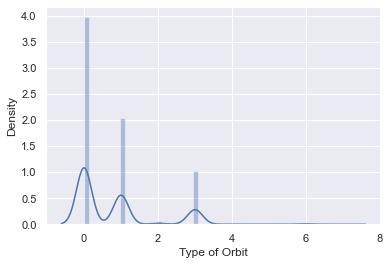

In [16]:
sns.distplot(data_no_mv['Type of Orbit'])

### Disclaimer: our data are not evenly distributed, so our model could work properly only for those data when we have sufficient amount of samples - accordingly: Non-Polar Inclined, Sun-Synchronous and Polar

### Split data to target and inputs (dependent variable and independent variables)

In [17]:
targets = data_no_mv['Type of Orbit']
inputs = data_no_mv.drop(['Type of Orbit'],axis=1)

### Standardization

In [18]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [19]:
inputs_scaled = scaler.transform(inputs)

### Split data to train and test

In [20]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

## MODELLING

In [21]:
clf = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')

clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [22]:
y_hat = clf.predict(x_train)
y_hat

array([1, 0, 0, ..., 1, 1, 0])

## Getting parameters

In [23]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'distance'}

### Getting the error rates of a set of models

In [24]:
error_uniform = []
error_distance = []

k_range = range(1, 51)

for k in k_range:
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_uniform.append(1 - accuracy_score(y_test, predictions))
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_distance.append(1 - accuracy_score(y_test, predictions))

### Plotting the error rates as a function of the number of neighbors

Text(0, 0.5, 'Error rate')

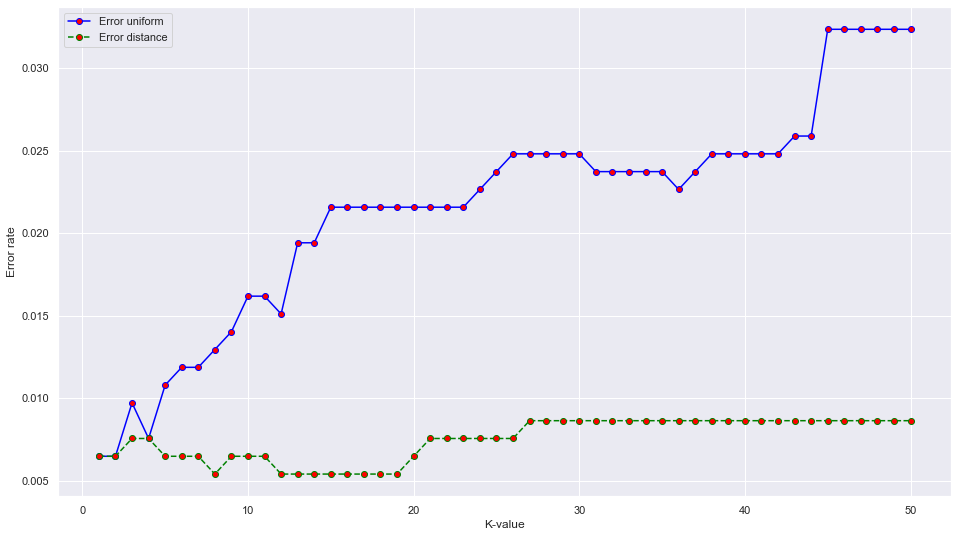

In [25]:
plt.figure(figsize = (16, 9))

plt.plot(k_range, error_uniform, c = 'blue', linestyle = 'solid', 
         marker = 'o', markerfacecolor = 'red',  label = 'Error uniform');
plt.plot(k_range, error_distance, c = 'green', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'red', label = 'Error distance');

plt.legend()

plt.xlabel('K-value')
plt.ylabel('Error rate')

### Choosing a set of parameters to test

In [26]:
parameters = {'n_neighbors':range(1, 51), 
              'weights':['uniform', 'distance']}

### Create an instance of the GridSearchCV class

In [27]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), 
                           param_grid = parameters, 
                           scoring = 'accuracy')

In [28]:
grid_search.fit(x_train, y_train)

/Users/pawelorawiec/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [29]:
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [30]:
clf = grid_search.best_estimator_
clf

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [31]:
grid_search.best_score_

0.9932523616734145

### Make predictions on the test dataset

In [32]:
y_test_pred = clf.predict(x_test)
y_test_pred.shape

(927,)

### Construct the confusion matrix

<Figure size 1296x648 with 0 Axes>

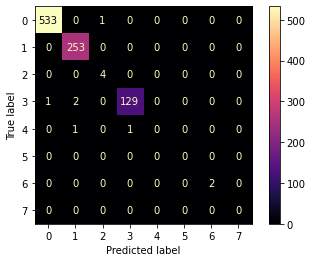

In [33]:
plt.figure(figsize = (18, 9))

sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

### Print out the classification report

In [34]:
print(classification_report(y_test, y_test_pred, target_names = ['0', '1', '2', '3', '4', '6']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       534
           1       0.99      1.00      0.99       253
           2       0.80      1.00      0.89         4
           3       0.99      0.98      0.98       132
           4       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2

    accuracy                           0.99       927
   macro avg       0.80      0.83      0.81       927
weighted avg       0.99      0.99      0.99       927



/Users/pawelorawiec/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pawelorawiec/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pawelorawiec/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)